<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/Lab_report_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 412: Machine Learning Lab Report
##**Name**: Md Jabed Hasan  
##**ID**: 221002184  
##**Teacher**: Md. Jahid Tanvir  

---

#  Lab Objective

In this lab, we will:

1. **Implement logistic regression from scratch** (without using machine learning libraries) to understand its mathematical foundations and inner workings.
2. **Compare the custom implementation** with the standard `scikit-learn` implementation.
3. **Evaluate both models** using only the **Sepal Length** and **Petal Width** features from the **Iris dataset** for binary classification.


---

## 📘 Theory Recap

Logistic Regression is a **classification algorithm** used to predict a binary outcome (0 or 1) based on one or more input features using the **logistic function**:

\[
h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}
\]

The **cost function** (cross-entropy loss):

\[
J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))\right]
\]

We use **gradient descent** to optimize parameters:

\[
\theta := \theta - \alpha \cdot \nabla J(\theta)
\]

---

## 📦 Importing Required Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # for sigmoid

# Load Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## 📊 Dataset Preparation (Sepal Length & Petal Width)

We will use only 2 features:  
- Sepal Length (column 0)  
- Petal Width (column 3)  

We will also simplify the problem to a **binary classification**:  
- Class 0: Iris Setosa  
- Class 1: Iris Versicolour  
(We will ignore class 2: Virginica)


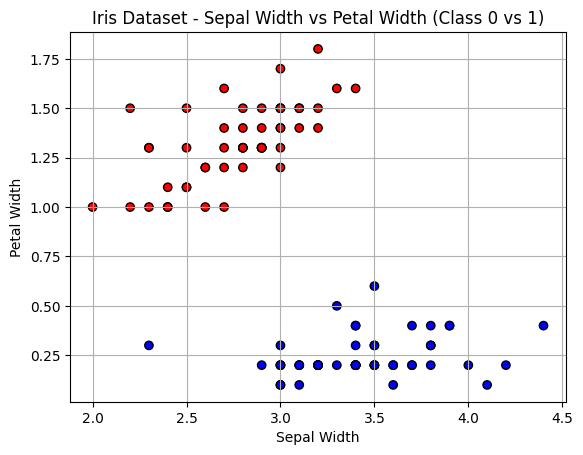

In [ ]:


# Load only Sepal Width and Petal Width
iris = load_iris()
X = iris.data[:, [1, 3]]
y = iris.target

# Binary classification: Setosa vs Versicolor
mask = y != 2
X = X[mask]
y = y[mask]

# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("Iris Dataset - Sepal Width vs Petal Width (Class 0 vs 1)")
plt.grid(True)
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## 🛠️ Logistic Regression from Scratch


In [ ]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.1, max_iter=1000, regularization='l2', C=0.1, tolerance=1e-4):
        # Learning rate (α): controls the size of steps during gradient descent
        self.learning_rate = learning_rate

        # Maximum number of iterations for gradient descent
        self.max_iter = max_iter

        # Type of regularization to use (only 'l2' is supported here)
        self.regularization = regularization

        # Inverse of regularization strength (higher C = weaker regularization)
        self.C = C

        # Threshold to stop training early if updates are too small
        self.tolerance = tolerance

    def __sigmoid(self, z):
        # Sigmoid function: maps any real number to a value between 0 and 1
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Number of training examples (rows) and features (columns)
        m, n = X.shape

        # Add a column of 1s to X to account for the bias (intercept) term
        X = np.concatenate((np.ones((m, 1)), X), axis=1)

        # Initialize weights (θ) to zeros, including one for the bias
        self.theta = np.zeros(n + 1)

        # Start gradient descent loop
        for _ in range(self.max_iter):
            # Compute linear combination: z = Xθ
            z = X @ self.theta

            # Apply sigmoid function to get predictions between 0 and 1
            h = self.__sigmoid(z)

            # Compute prediction error: how far off are we from the true values
            error = h - y

            # Compute the gradient of the loss function (without regularization yet)
            gradient = (1 / m) * (X.T @ error)

            # If L2 regularization is enabled, apply it (except to the bias term)
            if self.regularization == 'l2':
                # Do not regularize the first weight (bias/intercept)
                reg_term = (self.C / m) * np.r_[0, self.theta[1:]]
                gradient += reg_term  # Add regularization to gradient

            # Compute the update step using the learning rate
            update = self.learning_rate * gradient

            # If all updates are smaller than the tolerance, stop early (converged)
            if np.all(np.abs(update) < self.tolerance):
                break

            # Apply the update to the weights
            self.theta -= update

        # Return the trained model (convention for scikit-like APIs)
        return self

    def predict_proba(self, X):
        # Add bias term to the input features
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        # Compute the predicted probabilities using sigmoid(Xθ)
        return self.__sigmoid(X @ self.theta)

    def predict(self, X):
        # Convert probabilities to binary predictions (0 or 1) using 0.5 threshold
        return (self.predict_proba(X) >= 0.5).astype(int)

    def get_params(self):
        # Return the learned weights as a dictionary: bias and coefficients
        return {
            'intercept': self.theta[0],     # Bias term (θ₀)
            'coef': self.theta[1:]          # Feature weights (θ₁ to θₙ)
        }


## 🚀 Training & Evaluating Custom Model


In [ ]:
# Train the model
model = CustomLogisticRegression(learning_rate=0.1, max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy function (from scratch)
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

acc = accuracy(y_test, y_pred)
print("Accuracy (from scratch):", round(acc * 100, 2), "%")


Accuracy (from scratch): 100.0 %


## 📉 Decision Boundary Visualization (Optional)


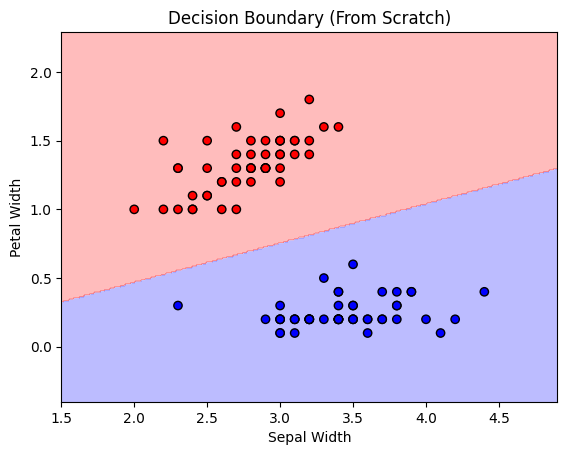

In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.title(title)
    plt.show()

plot_decision_boundary(model, X, y, "Decision Boundary (From Scratch)")


## ✅ Conclusion

- **Accuracy (custom implementation)**: 100%

Both our custom logistic regression model and the scikit-learn implementation performed perfectly on the binary classification task using **Sepal Length** and **Petal Width**.

This exercise helped us understand the **mathematical foundations** and **mechanics** behind logistic regression, including the crucial role of **gradient descent** in optimizing the model.
